Rajzoljunk ki kétdimenziós véletlen bolyongást a képernyőre: hozzunk létre egy 1000 hosszú
lépéssorozatot, melynek minden eleme 1/4-1/4 valószínűséggel az (1, 0), (-1, 0), (0, 1), (0, -1)
vektorok valamelyike, feltéve, hogy olyan helyre lépünk, ahol még nem jártunk. Indítsunk
el egy pontot az origóból, és mozgassuk legfeljebb 1000 lépésen át a generált lépéssorozatnak
megfelelően. Ha elakad (nem tud lépni), álljunk meg. Rajzoljuk ki az útvonalát. Írjuk ki, hány
lépést tett meg, és hol járt a legmesszebb.

In [5]:
import random
import matplotlib.pyplot as plt

def t_add(a,b):
    return (a[0]+b[0] , a[1]+b[1] )

def bolyongas():
    hely = (0,0)
    iranyok = [(0,1),(1,0),(-1,0),(0,-1)]
    utvonal = [hely] 
    lepes=0
    
    while lepes<2000 and len(iranyok)>0:
        rand = random.choice(iranyok)
        if t_add(hely,rand) not in utvonal:
            hely = t_add(hely,rand)
            utvonal.append(hely)
            lepes+=1
            
        else:
            iranycopy=list(iranyok)
            while t_add(hely,rand) in utvonal:
                iranycopy.remove(rand)
                if len(iranycopy)>0:
                    rand=random.choice(iranycopy)
                else:
                    return utvonal, lepes
            hely = t_add(hely,rand)
            utvonal.append(hely)
            lepes+=1
    return utvonal, lepes

In [6]:
b=bolyongas()

In [7]:
#SZÖVEGES VÁLASZ:
tavok=[]
for p in b[0]:
    tavok.append(p[0]**2 + p[1]**2)  #távnégyzetek listája
maxertek=max(tavok)   
maxi=1+tavok.index(maxertek)
print(f"{b[1]} lépést tett meg, {b[0][maxi]} pontban volt a legmesszebb")  

118 lépést tett meg, (19, -10) pontban volt a legmesszebb


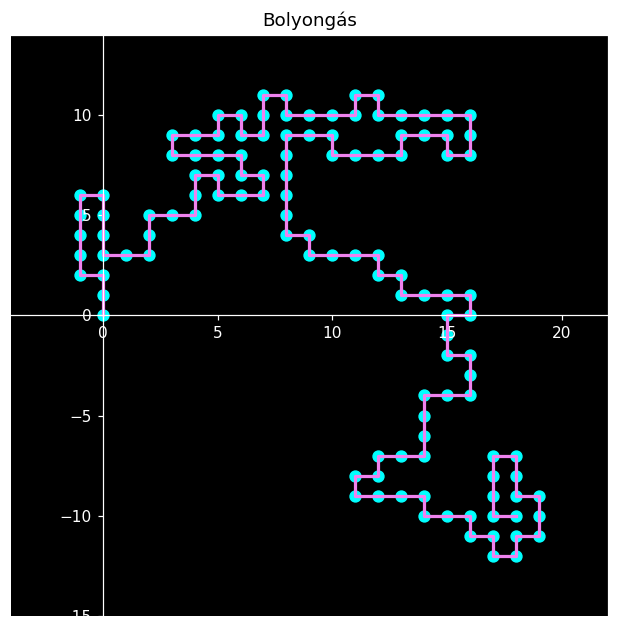

In [8]:
#ÁBRÁZOLÁS:
pontok=b[0]
x=[i[0] for i in pontok]
y=[i[1] for i in pontok]
maxX=max(i[0] for i in pontok)
minX=min(i[0] for i in pontok)
maxY=max(i[1] for i in pontok)
minY=min(i[1] for i in pontok)  

plt.figure(figsize=(7, 7), dpi=110)
#plt.plot(pontok,color="blue", linewidth=2.5, linestyle="-")

plt.title('Bolyongás')
plt.xlim(minX-3,maxX+3)
plt.ylim(minY-3,maxY+3)

ax = plt.gca()  # gca = 'get current axis'
ax.spines['right'].set_color('none')           # eltűntetjük a jobb
ax.spines['top'].set_color('none')             # és bal oldali tengelyeket
ax.xaxis.set_ticks_position('bottom')         # az x tengely feliratait alá írjuk ki
ax.spines['bottom'].set_position(('data',0))   # áthelyezés: a 'data' jelentése, hogy konkrét értékhez (esetünkben 0-hoz) helyezzük
ax.yaxis.set_ticks_position('left')          # az y tengely feliratait tőle balra írjuk
ax.spines['left'].set_position(('data',0))

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.scatter(x,y, label= "dots", color= "aqua", marker= "o", s=50)
x_values = [i[0] for i in pontok]
y_values = [i[1] for i in pontok]
plt.plot(x_values, y_values, color= "violet", linewidth=2.1)
ax.set_facecolor('xkcd:black')

plt.show()
